# MBAN 6400 Group Project(Part B)

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from scipy.cluster.vq import whiten,vq,kmeans
import seaborn as sns
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
import umap.umap_ as umap
import plotly.express as px
from scipy.stats import pearsonr


In [2]:
# drop discrete variables
data1 = pd.read_csv('new_data.csv')
data = data1.drop(columns = ['Unnamed: 0','PAID_FULL', 'TENURE_6.0', 'TENURE_7.0', 'TENURE_8.0', 'TENURE_9.0',
       'TENURE_10.0', 'TENURE_11.0', 'TENURE_12.0'])

In [53]:
data1.columns

Index(['Unnamed: 0', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'ONEOFFPURCHASES_TOTAL', 'TOTAL_OWED', 'PCT_PAID',
       'PAID_FULL', 'TENURE_6.0', 'TENURE_7.0', 'TENURE_8.0', 'TENURE_9.0',
       'TENURE_10.0', 'TENURE_11.0', 'TENURE_12.0'],
      dtype='object')

### PCA and KMeans

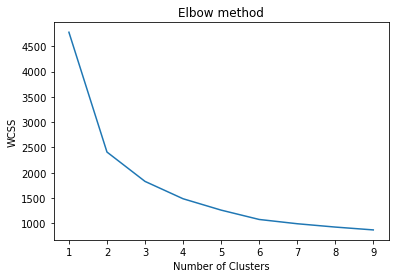

In [3]:
# KMeans Model
kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(data) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Parameter: {'n_clusters': 2} Score 0.44856777958483746
Parameter: {'n_clusters': 3} Score 0.444109912192546
Parameter: {'n_clusters': 4} Score 0.3907069791464858
Parameter: {'n_clusters': 5} Score 0.3946269298634691
Parameter: {'n_clusters': 6} Score 0.3918312303136574
Parameter: {'n_clusters': 7} Score 0.36473915804896867
Parameter: {'n_clusters': 8} Score 0.3343884344992829
Parameter: {'n_clusters': 9} Score 0.3374961651771428


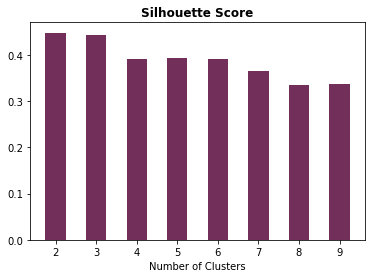

In [6]:
# candidate values for our number of cluster
parameters = [2,3, 4, 5,6,7,8,9]
# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(data)          # fit model on wine dataset, this will find clusters based on parameter p
    ss = metrics.silhouette_score(data, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p
# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

In [8]:
# PCA 2 components
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(data)
PCA_components = pd.DataFrame(pca_2_result)

print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))


print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))



Explained variation per principal component: [0.59875215 0.17503195]
Cumulative variance explained by 2 principal components: 77.38%


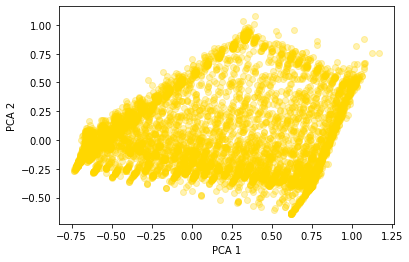

In [9]:
plt.scatter([item[0] for item in pca_2_result], [item[1] for item in pca_2_result], alpha=.3, color='gold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

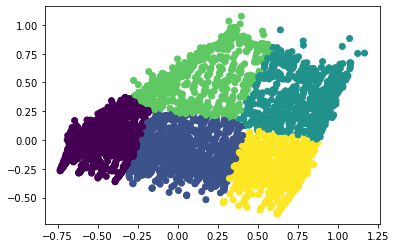

In [10]:
# fitting KMeans    
optimum_num_clusters = 5
model = KMeans(n_clusters=optimum_num_clusters)
model.fit(PCA_components.iloc[:,:2])
labels = model.predict(PCA_components.iloc[:,:2])
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

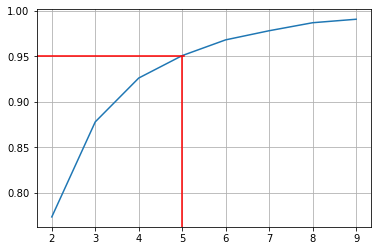

In [12]:
# PCA n components
explained = []
for i in [2,3,4,5,6,7,8,9]:
    pca_3 = PCA(n_components=i)
    pca_3_result = pca_3.fit_transform(data)
    PCA_components = pd.DataFrame(pca_3_result)
    explained.append(np.sum(pca_3.explained_variance_ratio_))

plt.plot([2,3,4,5,6,7,8,9],explained)
plt.axvline(x=5,ymin =0, ymax = 0.78,color='r')
plt.axhline(y=0.95, xmin=0, xmax = 0.44,color='r')
plt.grid()
plt.show()



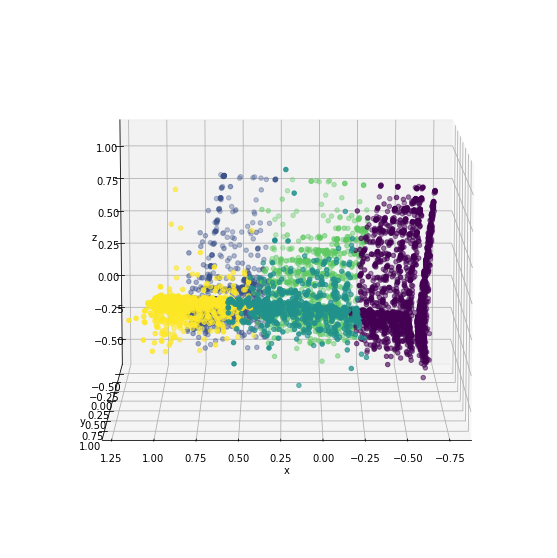

In [21]:
from past.builtins import xrange
pca_5 = PCA(n_components=5)
pca_5_result = pca_5.fit_transform(data)
x = [item[0] for item in pca_3_result]
y = [item[1] for item in pca_3_result]
z = [item[2] for item in pca_3_result]

from mpl_toolkits.mplot3d import Axes3D
optimum_num_clusters = 5
model = KMeans(n_clusters=optimum_num_clusters)
model.fit(PCA_components.iloc[:,:2])
labels = model.predict(PCA_components.iloc[:,:2])
x = [item[0] for item in pca_3_result]
y = [item[1] for item in pca_3_result]
z = [item[2] for item in pca_3_result]
fig = plt.figure(figsize=(10,10))


ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,c=labels)
ax.set_xlabel("x")

ax.set_ylabel("y")

ax.set_zlabel("z")
ax.view_init(elev=10., azim=90)

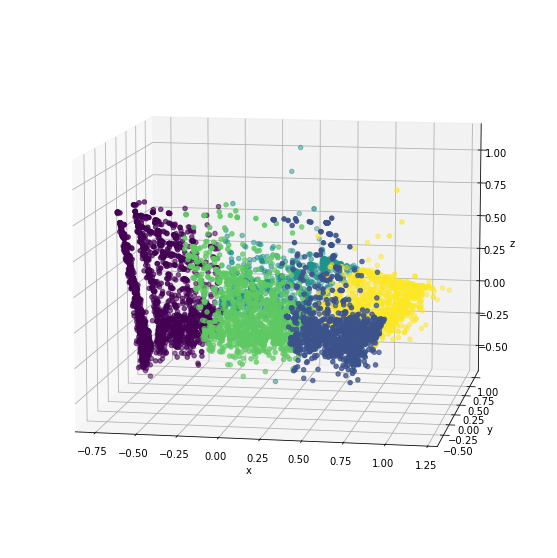

In [22]:
fig = plt.figure(figsize=(10,10))

bx = fig.add_subplot(111, projection='3d')
bx.scatter(x,y,z,c=labels)
bx.set_xlabel("x")

bx.set_ylabel("y")

bx.set_zlabel("z")
bx.view_init(elev=10., azim=280)

In [23]:
from scipy.stats import pearsonr
c= []
p =[]
for a in pca_5_result.T.tolist():
    for b in data.values.T:
        corr, p_value = pearsonr(a,b)
        c.append(corr)

In [24]:
df = pd.DataFrame(columns=['component_1', 'component_2', 'component_3','component_4','component_5'], index=data.columns)

for i in range(5):
    df.iloc[:,i] = np.array_split(c,5)[i]

In [25]:
df.style.background_gradient(cmap="viridis_r")

,component_1,component_2,component_3,component_4,component_5
BALANCE,-0.045914,0.225706,-0.474350,0.635587,0.159446
BALANCE_FREQUENCY,0.267682,0.280492,-0.890844,-0.227329,0.058577
PURCHASES,0.429999,0.349520,0.040021,0.301528,0.306732
ONEOFF_PURCHASES,0.279334,0.459737,0.073566,0.243203,0.257864
INSTALLMENTS_PURCHASES,0.503381,-0.018294,-0.040437,0.266007,0.251474
CASH_ADVANCE,-0.205532,0.085204,-0.313315,0.604310,-0.243698
PURCHASES_FREQUENCY,0.982135,0.056298,0.061130,-0.048054,-0.062464
ONEOFF_PURCHASES_FREQUENCY,0.466687,0.856969,0.182390,0.000536,-0.016694
PURCHASES_INSTALLMENTS_FREQUENCY,0.925575,-0.344801,-0.045125,0.078179,0.025974
CASH_ADVANCE_FREQUENCY,-0.298219,0.110954,-0.446449,0.544236,-0.614357


### The first principal component analysis
The first principal component is strongly correlated with four of the original variables. The first principal component increases with increasing INSTALLMENTS_PURCHASES, PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and PURCHASES_TRX. 

This suggests that these four criteria vary together. If one increases, then the remaining ones tend to increase as well.

Furthermore, we see that the first principal component correlates most strongly with the PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY. 

In fact, we could state that based on the correlation of PURCHASES_FREQUENCY(0.982), as from Part A of the project, both variables are highly correlated.

### The seconnd principal component analysis
The first principal component is strongly correlated with 1 of the original variables ONEOFF_PURCHASES_FREQUENCY.

### The third principal component analysis
The first principal component is negatively strongly correlated with 1 of the original variables. BALANCE_FREQUENCY.

### The fourth principal component analysis
The first principal component is strongly correlated with 7 of the original variables. BALANCE, CASH_ADVANCE, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX,CREDIT_LIMIT, PAYMENTS, TOTAL_OWED

### The fifth principal component analysis
The first principal component is negatively strongly correlated with 7 of the original variables. CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX

In [36]:
def chart(X, y):
    #--------------------------------------------------------------------------#
    # This section is not mandatory as its purpose is to sort the data by label 
    # so, we can maintain consistent colors for digits across multiple graphs
    
    # Concatenate X and y arrays
    arr_concat=np.concatenate((X, y.reshape(y.shape[0],1)), axis=1)
    # Create a Pandas dataframe using the above array
    df=pd.DataFrame(arr_concat,columns=['BALANCE_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','label'])
    # Convert label data type from float to integer
    df['label'].astype(int)
    # Finally, sort the dataframe by label
    df.sort_values(by='label', axis=0, ascending=True, inplace=True)
    #--------------------------------------------------------------------------#
    
    # Create a 3D graph
    fig = px.scatter_3d(df, x='BALANCE_FREQUENCY', y='ONEOFF_PURCHASES_FREQUENCY', z='PURCHASES_INSTALLMENTS_FREQUENCY', color=df['label'].astype(str), height=900, width=950)
#'BALANCE_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY'
    # Update chart looks
    fig.update_layout(title_text='segment distribution',
                      showlegend=True,
                      legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                      scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                            center=dict(x=0, y=0, z=-0.1),
                                            eye=dict(x=1.5, y=-1.4, z=0.5)),
                                            margin=dict(l=0, r=0, b=0, t=0),
                      scene = dict(xaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             ),
                                   yaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                              ),
                                   zaxis=dict(backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             )))
    # Update marker size
    fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
    
    fig.show()


In [10]:
pca = PCA(n_components=0.8, random_state=42)
pca_data = pca.fit_transform(data)
PC_names = ['PC'+str(x) for x in range(1,len(pca.components_)+1)]
pca_data = pd.DataFrame(pca.transform(data), columns=PC_names)

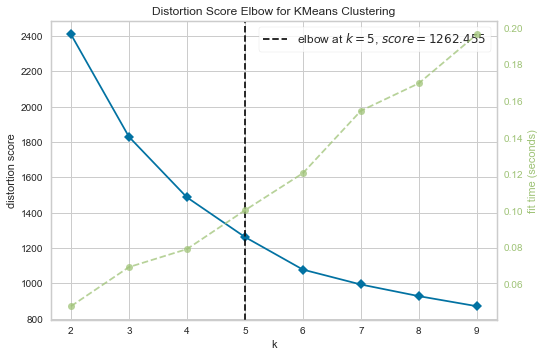

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(2,10))

distortion_visualizer.fit(data)       
distortion_visualizer.show()      

In [12]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans.fit(data)
data_cluster= data.copy()
data_cluster['Segment'] = kmeans.labels_

In [14]:
pca_data

,PC1,PC2,PC3
0,-0.466073,-0.112939,0.044726
1,-0.634076,-0.009619,-0.154795
2,0.336514,0.904828,0.167287
3,-0.577134,-0.010757,0.176604
4,-0.541545,0.026664,-0.110541
...,...,...,...
8945,0.622872,-0.347587,-0.087113
8946,0.622892,-0.347648,-0.087085
8947,0.380361,-0.326117,0.059826
8948,-0.645139,-0.084597,-0.004573


In [37]:
chart(data[['BALANCE_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY']], kmeans.labels_)

In [35]:
pd.DataFrame(np.concatenate((data[['BALANCE_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY']], kmeans.labels_.reshape(kmeans.labels_.shape[0],1)), axis=1),columns=['BALANCE_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','label'])

,BALANCE_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,label
0,0.82,0.00,0.08,0.0
1,0.91,0.00,0.00,0.0
2,1.00,1.00,0.00,4.0
3,0.64,0.08,0.00,2.0
4,1.00,0.08,0.00,0.0
...,...,...,...,...
8945,1.00,0.00,0.83,1.0
8946,1.00,0.00,0.83,1.0
8947,0.83,0.00,0.67,1.0
8948,0.83,0.00,0.00,0.0
